# 1 Import libraries

In [1]:
#importing Libraries
import numpy as np
import pandas as pd
from matplotlib.pylab import plt
import seaborn as sns
# from sqlalchemy import create_engine
# import sqlalchemy as 
import sqlite3
from sklearn.metrics import f1_score

from wordcloud import WordCloud


# Comments on the document

In [2]:
######## 
# This is Elisa's Code from 2023-06-06

# loaded dataset (new subset of original dataset and pre-processed)
# df = pd.read_pickle("strats_new.pkl")

# 177831 entries (3 labels)
# after removing "mixed" class and missing values:
# 0.0    61222    real news
# 1.0    50058    fake news



#######

# Classification on Text Variables of our Data
# for text analysis:
# retrieve 2 columns title and content

# before fitting: vectorize with TF-IDF Vectorizer + remove stop_words 



#######################################################

# 1 MAJOR ANALYSIS CHAPTER IN THIS NOTEBOOK

##############################




##############################
### TODO: UPDATE RESULTS #####
##############################



# ANALYSIS 2: 2 CLASSES

#### Models:
# LightGBM
# Naive Bayes Bernoulli
# Naive Bayes Multinomial
# Naive Bayes Complement
# Naive Bayes Gaussian --> not working due to memory error

# Gradient Boosting
# CatBoost
# XGBoost

# KNN --> takes 2 hours; only ran once a while ago, not again
# SVM --> takes 3,5 hours; only ran once a while ago, not again

# Passive Aggressive Classifier
# Logistic Regression
# Bagging --> takes 2 hours



### Results Accuracy

# LightGBM vect accuracy score : 0.8106128684399713
# Naive Bayes Bernoulli vect accuracy score : 0.7168404025880661
# Naive Bayes Multinomial vect accuracy score : 0.7893601725377426
# Naive Bayes Complement vect accuracy score : 0.7967739036664271

# GradientBoosting vect accuracy score : 0.6890726096333573
# CatBoost vect accuracy score : 0.779744787922358 (50 iterations)
# XGBoost vect accuracy score : 0.7777228612508986

# KNN --> not run again, no result
# SVM --> not run again, no result

# Passive Aggressive vect accuracy score : 0.8211718188353703
# Logistic Regression vect accuracy score : 0.8566678648454349
# Bagging vect accuracy score : 0.7891804457225018
# Random Forest vect accuracy score : 0.7948418404025881



### Results f1 score

# LightGBM vect f1 score : 0.7784959798202743
# Naive Bayes Bernoulli vect f1 score : 0.7142986671502404
# Naive Bayes Multinomial vect f1 score : 0.7241054613935969
# Naive Bayes Complement vect f1 score : 0.7426458036984354

# GradientBoosting vect f1 score : 0.6323451280416533
# CatBoost vect f1 score : 0.7018594390167034 (20 iterations)
# CatBoost vect f1 score : 0.7426771653543308 (50 iterations)
# XGBoost vect f1 score : 0.7417114812300946

# KNN --> not run again, no result
# SVM --> not run again, no result

# Passive Aggressive vect f1 score : 0.8027945694182935
# Logistic Regression vect f1 score : 0.8369287393927001
# Bagging vect f1 score : 0.7425373134328358


# LOADING NEW STRATIFIED AND PREPROCESSED DATASET strats_new.pkl

In [2]:
# retrieve dataset
df = pd.read_pickle("strats_new.pkl")

In [3]:
df.head(5)

,id,date,source,title,content,author,url,published,published_utc,collection_utc,...,label,bias,factuality,questionable-source,conspiracy-pseudoscience,pro-science,word_count_content,word_count_title,nb_character_content,nb_character_title
0,21stcenturywire--2022-04-26--An Unsettling Rea...,2022-04-26,21stcenturywire,An Unsettling Realization: ‘Mask Zealots are S...,It’s been noted how the fanatical nature of ma...,NEWS WIRE,https://21stcenturywire.com/2022/04/26/an-unse...,"Tue, 26 Apr 2022 10:31:24 +0000",1650983484,1651010407,...,1.0,conspiracy-pseudoscience,2.0,0.0,1.0,0.0,108,8,720,61
1,21stcenturywire--2022-04-24--Episode #416 – ‘S...,2022-04-24,21stcenturywire,Episode #416 – ‘Soldiers of Fortune’ with gues...,Episode #416 of SUNDAY WIRE SHOW resumes this ...,NEWS WIRE,https://21stcenturywire.com/2022/04/24/episode...,"Sun, 24 Apr 2022 14:00:48 +0000",1650823248,1651010408,...,1.0,conspiracy-pseudoscience,2.0,0.0,1.0,0.0,179,11,1143,66
2,21stcenturywire--2022-07-15--UKC News: UK Thou...,2022-07-15,21stcenturywire,"UKC News: UK Thought Police, France Stops Vacc...",Authoritarians in the UK government are gettin...,NEWS WIRE,https://21stcenturywire.com/2022/07/15/ukc-new...,"Fri, 15 Jul 2022 16:26:25 +0000",1657916785,1657922407,...,1.0,conspiracy-pseudoscience,2.0,0.0,1.0,0.0,207,13,1340,82
3,21stcenturywire--2022-05-22--Twitter Audit Fin...,2022-05-22,21stcenturywire,Twitter Audit Finds Half of President Biden’s ...,"After the 2020 election, many Americans began ...",NEWS WIRE,https://21stcenturywire.com/2022/05/22/twitter...,"Sun, 22 May 2022 12:17:48 +0000",1653236268,1653256808,...,1.0,conspiracy-pseudoscience,2.0,0.0,1.0,0.0,504,11,3274,69
4,21stcenturywire--2022-03-11--UKC News: The Tru...,2022-03-11,21stcenturywire,UKC News: The Truth About US Bio Labs + White ...,The high stakes game surrounding the Ukraine c...,NEWS WIRE,https://21stcenturywire.com/2022/03/11/ukc-new...,"Fri, 11 Mar 2022 19:18:16 +0000",1647044296,1647039605,...,1.0,conspiracy-pseudoscience,2.0,0.0,1.0,0.0,147,14,908,70


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177831 entries, 0 to 177830
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        177831 non-null  object 
 1   date                      177831 non-null  object 
 2   source                    177831 non-null  object 
 3   title                     177831 non-null  object 
 4   content                   177831 non-null  object 
 5   author                    177831 non-null  object 
 6   url                       177831 non-null  object 
 7   published                 177831 non-null  object 
 8   published_utc             177831 non-null  int64  
 9   collection_utc            177831 non-null  int64  
 10  country                   106074 non-null  object 
 11  label                     111280 non-null  float64
 12  bias                      111280 non-null  object 
 13  factuality                110158 non-null  f

In [5]:
# inspect labels
df["label"].value_counts()

# slightly unbalanced


0.0    61222
1.0    50058
Name: label, dtype: int64

In [6]:
df.isna().sum()

id                              0
date                            0
source                          0
title                           0
content                         0
author                          0
url                             0
published                       0
published_utc                   0
collection_utc                  0
country                     71757
label                       66551
bias                        66551
factuality                  67673
questionable-source         66551
conspiracy-pseudoscience    66551
pro-science                 66551
word_count_content              0
word_count_title                0
nb_character_content            0
nb_character_title              0
dtype: int64

In [7]:
# delete missing values in label
df.dropna(subset=['label'], axis = 0, inplace=True)


In [8]:
df.isna().sum()

id                             0
date                           0
source                         0
title                          0
content                        0
author                         0
url                            0
published                      0
published_utc                  0
collection_utc                 0
country                     5206
label                          0
bias                           0
factuality                  1122
questionable-source            0
conspiracy-pseudoscience       0
pro-science                    0
word_count_content             0
word_count_title               0
nb_character_content           0
nb_character_title             0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111280 entries, 0 to 177830
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        111280 non-null  object 
 1   date                      111280 non-null  object 
 2   source                    111280 non-null  object 
 3   title                     111280 non-null  object 
 4   content                   111280 non-null  object 
 5   author                    111280 non-null  object 
 6   url                       111280 non-null  object 
 7   published                 111280 non-null  object 
 8   published_utc             111280 non-null  int64  
 9   collection_utc            111280 non-null  int64  
 10  country                   106074 non-null  object 
 11  label                     111280 non-null  float64
 12  bias                      111280 non-null  object 
 13  factuality                110158 non-null  f

In [10]:
# inspect labels
df["label"].value_counts()

# slightly unbalanced
# deleteion of missing labels did not change the number of labels


0.0    61222
1.0    50058
Name: label, dtype: int64

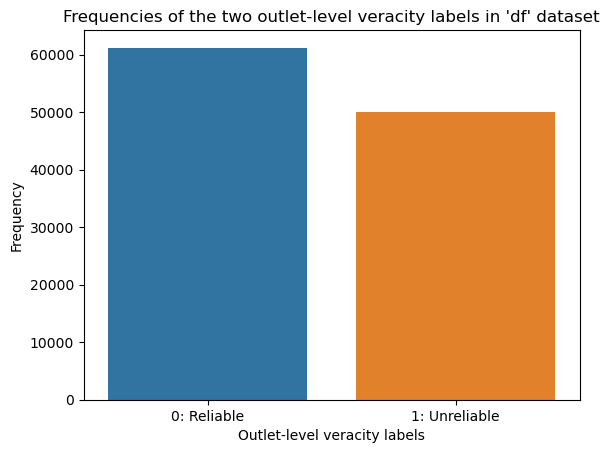

In [11]:
# barplot of labels
sns.countplot(x = "label", data = df)
plt.xticks(np.arange(2),["0: Reliable", "1: Unreliable"])
plt.ylabel("Frequency")
plt.xlabel("Outlet-level veracity labels")
plt.title("Frequencies of the two outlet-level veracity labels in 'df' dataset")
plt.show();


# Create ML Models on text data (TF-IDF VECTORIZING WITHOUT STOPWORDS)


In [ ]:
# LightGBM
# Naive Bayes Bernoulli
# Naive Bayes Multinomial
# Naive Bayes Complement
# Naive Bayes Gaussian --> not working due to memory error

# Gradient Boosting
# CatBoost
# XGBoost

# KNN --> takes 2 hours; only ran once a while ago, not again
# SVM --> takes 3,5 hours; only ran once a while ago, not again



# Remove Stop Words 

In [12]:
import nltk
from nltk.corpus import stopwords

# Download stopwords corpus if not already downloaded
nltk.download('stopwords')

# Load the stopwords
stop_words = set(stopwords.words('english'))  # You can choose a different language if needed

# Update stop words variable
# stop_words.update([",", "."])

additional_words = ["?", "!", ".", ",", ":", ";", "-", "--", "...", '"', "'"]
stop_words.update(set(additional_words))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nutzer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
# show stop words
print(stop_words)


{'off', ';', 'those', 's', 'down', 'you', 'yourself', 'above', 'a', 'this', '!', 'itself', 'most', 'been', 'of', 'few', 'all', 'is', 'are', 'will', 'don', 'when', "hadn't", 'shan', 'being', 'through', "wasn't", 'each', 'himself', ',', 'our', 'but', 'she', 'do', 'because', 'were', 'about', 'and', 'too', 'very', 'that', 'weren', 'nor', '--', 'him', 'd', 've', 'couldn', "mightn't", 'other', 'm', 'theirs', 'if', 'into', "'", 'these', 'over', 'should', "didn't", 'during', 'same', "hasn't", 'at', 'mightn', 'my', 'am', 're', "doesn't", "shan't", '-', 'between', "needn't", 'yourselves', 'they', '?', 'in', 'no', 'under', 'below', 'from', 'her', 'just', "couldn't", "wouldn't", 'there', 'then', 'them', 'with', 'to', 'aren', 'any', 'had', "don't", 'whom', 'here', 'your', 'where', 'out', 'further', 'has', 'needn', 'his', 'or', 'after', 'for', "mustn't", 'hers', 'having', 'hasn', 'its', 'myself', 'we', "that'll", 'again', 'both', 'ours', 'which', 'shouldn', 'won', 'did', 'an', 'by', 'hadn', 'mustn',

In [14]:
# content before removing stop words
df["content"][:10]


0    It’s been noted how the fanatical nature of ma...
1    Episode #416 of SUNDAY WIRE SHOW resumes this ...
2    Authoritarians in the UK government are gettin...
3    After the 2020 election, many Americans began ...
4    The high stakes game surrounding the Ukraine c...
5    On the February 3, 2022 episode of Patrick Hen...
6    These are the darkest, most difficult days in ...
7    A shocking new trend is on the move in America...
8    In this episode of the Patrick Henningsen Show...
9    Liz Cheney invokes Ronald Reagan to bash those...
Name: content, dtype: object

In [15]:
# Apply
df['content_cleaned'] = df['content'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))


In [16]:
df["content_cleaned"][:10]


0    It’s noted fanatical nature masking proponents...
1    Episode #416 SUNDAY WIRE SHOW resumes week, Ap...
2    Authoritarians UK government getting increasin...
3    2020 election, many Americans began question m...
4    high stakes game surrounding Ukraine conflict ...
5    February 3, 2022 episode Patrick Henningsen Sh...
6    darkest, difficult days human history. facing ...
7    shocking new trend move America: following his...
8    episode Patrick Henningsen Show TNT Radio aire...
9    Liz Cheney invokes Ronald Reagan bash GOP want...
Name: content_cleaned, dtype: object

# Create X and Y (only title and text)
# X_train_text, X_test_text, Y_train, Y_test (uppercase letters)


In [18]:
# STEP 1: DEFINE X and Y
X = df.drop("label", axis=1)
Y = df["label"]


In [19]:
X.columns = X.columns.astype(str)

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111280 entries, 0 to 177830
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        111280 non-null  object 
 1   date                      111280 non-null  object 
 2   source                    111280 non-null  object 
 3   title                     111280 non-null  object 
 4   content                   111280 non-null  object 
 5   author                    111280 non-null  object 
 6   url                       111280 non-null  object 
 7   published                 111280 non-null  object 
 8   published_utc             111280 non-null  int64  
 9   collection_utc            111280 non-null  int64  
 10  country                   106074 non-null  object 
 11  bias                      111280 non-null  object 
 12  factuality                110158 non-null  float64
 13  questionable-source       111280 non-null  f

In [21]:
X.isnull().sum()

id                             0
date                           0
source                         0
title                          0
content                        0
author                         0
url                            0
published                      0
published_utc                  0
collection_utc                 0
country                     5206
bias                           0
factuality                  1122
questionable-source            0
conspiracy-pseudoscience       0
pro-science                    0
word_count_content             0
word_count_title               0
nb_character_content           0
nb_character_title             0
content_cleaned                0
dtype: int64

In [22]:
Y.info()

<class 'pandas.core.series.Series'>
Int64Index: 111280 entries, 0 to 177830
Series name: label
Non-Null Count   Dtype  
--------------   -----  
111280 non-null  float64
dtypes: float64(1)
memory usage: 1.7 MB


In [23]:
Y.isnull().sum()

0

## Create Train / Test Datasets

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


# Vectorizing

### TFIDF Vectorizing
### USING CONTENT_CLEANED AND TITLE ONLY


In [25]:
# VECTORIZING
# TAKES 2 MINUTES

from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack, csr_matrix

vectorizer1 = TfidfVectorizer()
vectorizer2 = TfidfVectorizer()

vectorizer1.fit(X_train['content_cleaned'])
vectorizer2.fit(X_train['title'])


TfidfVectorizer()

In [26]:
# TAKES 2 MINUTES

X_train_content = vectorizer1.transform(X_train['content_cleaned'])
X_train_title = vectorizer2.transform(X_train['title'])
X_test_content = vectorizer1.transform(X_test['content_cleaned'])
X_test_title = vectorizer2.transform(X_test['title'])


In [27]:
X_train_text = hstack([X_train_content, X_train_title])
X_test_text = hstack([X_test_content, X_test_title])


In [28]:
X_train_text

<89024x317198 sparse matrix of type '<class 'numpy.float64'>'
	with 18555402 stored elements in Compressed Sparse Row format>

In [29]:
X_train_text.shape

(89024, 317198)

In [30]:
X_test_text

<22256x317198 sparse matrix of type '<class 'numpy.float64'>'
	with 4593622 stored elements in Compressed Sparse Row format>

In [31]:
X_test_text.shape

(22256, 317198)

In [32]:
Y_train

55316     1.0
110413    0.0
79862     0.0
8271      1.0
111039    0.0
         ... 
26918     1.0
34657     0.0
114871    1.0
177328    1.0
11898     1.0
Name: label, Length: 89024, dtype: float64

In [33]:
Y_test

26370     1.0
159889    0.0
60942     1.0
76022     0.0
100811    1.0
         ... 
16707     0.0
174314    0.0
60933     0.0
51418     1.0
92609     1.0
Name: label, Length: 22256, dtype: float64

# LightGBM Model

In [34]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [35]:
# Create a LightGBM dataset for training

LightGMB_train_data_text = lgb.Dataset(X_train_text, label=Y_train)

# Set the hyperparameters for the LightGBM model
paramsLightGBM = {
    'boosting_type': 'gbdt',
    'objective': 'binary',  # Set the appropriate objective for your classification task
    'metric': 'binary_logloss',  # Set the appropriate metric for evaluation
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}


In [36]:
# Train the LightGBM model)
clf_LightGBM_vect = lgb.train(paramsLightGBM, LightGMB_train_data_text, num_boost_round=100)

# takes 10 minutes


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 21.505985 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


In [38]:
# Make predictions on the test set
y_pred_LightGBM_vect = clf_LightGBM_vect.predict(X_test_text)
y_pred_LightGBM_vect = [round(pred) for pred in y_pred_LightGBM_vect]  # Convert probability to binary predictions


In [39]:
# Evaluate the model with accuracy
accuracy_LightGBM_vect = accuracy_score(Y_test, y_pred_LightGBM_vect)
print("Accuracy LightGBM vect:", accuracy_LightGBM_vect)

# 0.81


Accuracy LightGBM vect: 0.8106128684399713


In [40]:
# Evaluate the model with f1 score
from sklearn.metrics import f1_score

f1_LightGBM_vect = f1_score(Y_test, y_pred_LightGBM_vect)
f1_LightGBM_vect

# 0.78


0.7784959798202743

In [41]:
# get confusion matrix
pd.crosstab(Y_test, y_pred_LightGBM_vect, rownames=["true"], colnames=["predict"])


predict,0,1
true,,
0.0,10634,1607
1.0,2608,7407


In [42]:
# STEP 7: Evaluate Model with confusion matrix 
from sklearn.metrics import confusion_matrix 

cf_matrix_LightGBM_vect = confusion_matrix(Y_test, y_pred_LightGBM_vect)

print("Confusion Matrix:\n",  cf_matrix_LightGBM_vect)


Confusion Matrix:
 [[10634  1607]
 [ 2608  7407]]


In [172]:
# STEP 9: Evaluate model with classification report
from sklearn.metrics import classification_report 

print("LightGBM vect classification report:\n", classification_report (Y_test, y_pred_LightGBM_vect))


LightGBM vect classification report:
               precision    recall  f1-score   support

         0.0       0.81      0.86      0.83     12300
         1.0       0.81      0.74      0.78      9956

    accuracy                           0.81     22256
   macro avg       0.81      0.80      0.80     22256
weighted avg       0.81      0.81      0.81     22256



# Naive Bayes Bernoulli Model

In [43]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [44]:
# Create a Bernoulli Naive Bayes classifier
clf_Bern_vect = BernoulliNB()


In [45]:
# Train the classifier
clf_Bern_vect.fit(X_train_text, Y_train)


BernoulliNB()

In [46]:
# Make predictions on the test set
y_pred_NB_Bern_vect = clf_Bern_vect.predict(X_test_text)


In [47]:
# Evaluate the model with accuracy
accuracy_NB_Bern_vect = accuracy_score(Y_test, y_pred_NB_Bern_vect)
print("Accuracy:", accuracy_NB_Bern_vect)

# 0.72


Accuracy: 0.7168404025880661


In [49]:
# Evaluate the model with f1 score
from sklearn.metrics import f1_score

f1_NB_Bern_vect = f1_score(Y_test, y_pred_NB_Bern_vect)
f1_NB_Bern_vect

# 0.71


0.7142986671502404

In [50]:
# STEP 7: Evaluate Model with confusion matrix 
from sklearn.metrics import confusion_matrix 

cf_matrix_NB_Bern_vect = confusion_matrix(Y_test, y_pred_NB_Bern_vect)
print("Confusion Matrix:\n",  cf_matrix_NB_Bern_vect)


Confusion Matrix:
 [[8076 4165]
 [2137 7878]]


In [51]:
# STEP 9: Evaluate model with classification report
from sklearn.metrics import classification_report 

print("Naive Bayes Bernoulli vect classification report:\n", classification_report (Y_test, y_pred_NB_Bern_vect))


Naive Bayes Bernoulli vect classification report:
               precision    recall  f1-score   support

         0.0       0.79      0.66      0.72     12241
         1.0       0.65      0.79      0.71     10015

    accuracy                           0.72     22256
   macro avg       0.72      0.72      0.72     22256
weighted avg       0.73      0.72      0.72     22256



# MULTINOMIAL NAIVE BAYES


In [52]:
from sklearn.naive_bayes import MultinomialNB

In [53]:
from sklearn.naive_bayes import MultinomialNB
clf_mult_vect = MultinomialNB()


In [54]:
# fit the model
clf_mult_vect.fit(X_train_text, Y_train)


MultinomialNB()

In [55]:
y_pred_NB_Mult_vect = clf_mult_vect.predict(X_test_text)


In [56]:
# get accuracy
accuracy_NB_Mult_vect = clf_mult_vect.score(X_test_text, Y_test)
accuracy_NB_Mult_vect

# 0.79


0.7893601725377426

In [199]:
# Evaluate the model with f1 score
from sklearn.metrics import f1_score

f1_NB_Mult_vect = f1_score(Y_test, y_pred_NB_Mult_vect)
f1_NB_Mult_vect

# 0.72

0.7241054613935969

In [60]:
# get confusion matrix
pd.crosstab(Y_test, y_pred_NB_Mult_vect, rownames=["true"], colnames=["predict"])


predict,0.0,1.0
true,,
0.0,11416,825
1.0,3863,6152


In [61]:
from sklearn.metrics import classification_report 

# get classification report
print("Naive Bayes Multinomial Vect classification report:\n ", classification_report (Y_test, y_pred_NB_Mult_vect))

Naive Bayes Multinomial Vect classification report:
                precision    recall  f1-score   support

         0.0       0.75      0.93      0.83     12241
         1.0       0.88      0.61      0.72     10015

    accuracy                           0.79     22256
   macro avg       0.81      0.77      0.78     22256
weighted avg       0.81      0.79      0.78     22256



In [62]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix


In [138]:
# create confusion matrix
cf_matrix_NB_Mult_vect = confusion_matrix(Y_test, y_pred_NB_Mult_vect)
print(cf_matrix_NB_Mult_vect)


[[11416   825]
 [ 3863  6152]]


In [64]:
# absolute values
# fig, ax = plot_confusion_matrix(conf_mat=cf_matrix_Multinomial_vect,
#                                 colorbar=True)

# plt.show()

In [65]:
# percent
# sns.heatmap(cf_matrix_Multinomial_vect/np.sum(cf_matrix_Multinomial_vect), annot=True, 
#             fmt='.2%', cmap='Blues')

# COMPLEMENT NAIVE BAYES


In [66]:
from sklearn.naive_bayes import ComplementNB
clf_compl_vect = ComplementNB()


In [67]:
# fit model
clf_compl_vect.fit(X_train_text, Y_train)


ComplementNB()

In [68]:
y_pred_NB_Compl_vect = clf_compl_vect.predict(X_test_text)


In [69]:
# get accuracy
accuracy_NB_Compl_vect = clf_compl_vect.score(X_test_text, Y_test)
accuracy_NB_Compl_vect

# 0.79677

0.7967739036664271

In [70]:
# Evaluate the model with f1 score
from sklearn.metrics import f1_score

f1_NB_Compl_vect = f1_score(Y_test, y_pred_NB_Compl_vect)
f1_NB_Compl_vect

# 0.74

0.7426458036984354

In [71]:
# get confusion matrix
pd.crosstab(Y_test, y_pred_NB_Compl_vect, rownames=["true"], colnames=["predict"])


predict,0.0,1.0
true,,
0.0,11207,1034
1.0,3489,6526


In [72]:
from sklearn.metrics import classification_report 

# get classification report
print("Naive Bayes Complement vect classification report:\n ", classification_report (Y_test, y_pred_NB_Compl_vect))


Naive Bayes Complement vect classification report:
                precision    recall  f1-score   support

         0.0       0.76      0.92      0.83     12241
         1.0       0.86      0.65      0.74     10015

    accuracy                           0.80     22256
   macro avg       0.81      0.78      0.79     22256
weighted avg       0.81      0.80      0.79     22256



In [73]:
# create confusion matrix
cf_matrix_Compl_vect = confusion_matrix(Y_test, y_pred_NB_Compl_vect)
print(cf_matrix_Compl_vect)


[[11207  1034]
 [ 3489  6526]]


In [77]:
# absolute values
# fig, ax = plot_confusion_matrix(conf_mat=cf_matrix_Complement_vect,
#                                 colorbar=True)

# plt.show();


In [78]:
# percent
# sns.heatmap(cf_matrix_Complement_vect/np.sum(cf_matrix_Complement_vect), annot=True, 
#             fmt='.2%', cmap='Blues');


# Create NAIVE BAYES Gaussian
# not possible due to memory error


In [ ]:
# transform to avoid sparse matrix
# Convert sparse matrix to dense numpy array
# X_train_text_dense = X_train_text.toarray()


In [74]:
# from sklearn.naive_bayes import GaussianNB
# clf_gau_vect = GaussianNB()


In [ ]:
# clf_gau_vect.fit(X_train_text, Y_train)


In [ ]:
# get accuracy
# accuracyNB_Gaussian_vect = clf_gau_vect.score(X_test_text, y_test)
# accuracyNB_Gaussian_vect


In [ ]:
# get confusion matrix
# y_pred_NB_Gaussian_vect = clf_gau_vect.predict(X_test_text)
# pd.crosstab(y_test, y_pred_NB_Gaussian_vect, rownames=["real"], colnames=["predict"])


In [ ]:
# from sklearn.metrics import classification_report 

# get classification report
# print("Naive Bayes Gaussian vect classification report:\n ", classification_report (y_test, y_pred_NB_Gaussian_vect))

# really bad overall


In [ ]:
# create confusion matrix
# cf_matrix_Gaussian_vect = confusion_matrix(y_test, y_pred_NB_Gaussian_vect)
# print(cf_matrix_Gaussian_vect)


# GradientBoosting Model


In [76]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a GradientBoostingClassifier object
GradBoost_vect = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1, max_depth=3)


In [77]:
# Fit the model on the training data
GradBoost_vect.fit(X_train_text, Y_train)

# takes 10 minutes

GradientBoostingClassifier(n_estimators=10)

In [78]:
# Make predictions on the test data
y_pred_GradBoost_vect = GradBoost_vect.predict(X_test_text)


In [79]:
# Evaluate the model with accuracy
accuracy_GradBoost_vect = accuracy_score(Y_test, y_pred_GradBoost_vect)
accuracy_GradBoost_vect

# 0.69

0.6890726096333573

In [80]:
# Evaluate the model with f1 score
from sklearn.metrics import f1_score

f1_GradBoost_vect = f1_score(Y_test, y_pred_GradBoost_vect)
f1_GradBoost_vect

# 0.63

0.6323451280416533

In [81]:
# Get crosstab
pd.crosstab(Y_test, y_pred_GradBoost_vect, rownames=["true"], colnames=["predict"])


predict,0.0,1.0
true,,
0.0,9385,2856
1.0,4064,5951


In [82]:
# from sklearn.metrics import classification_report 

# get classification report
print("GradientBoosting vect classification report:\n ", classification_report (Y_test, y_pred_GradBoost_vect))


GradientBoosting vect classification report:
                precision    recall  f1-score   support

         0.0       0.70      0.77      0.73     12241
         1.0       0.68      0.59      0.63     10015

    accuracy                           0.69     22256
   macro avg       0.69      0.68      0.68     22256
weighted avg       0.69      0.69      0.69     22256



In [83]:
# create confusion matrix
cf_matrix_GradBoost_vect = confusion_matrix(Y_test, y_pred_GradBoost_vect)
print(cf_matrix_GradBoost_vect)


[[9385 2856]
 [4064 5951]]


# CatBoost Model


In [162]:
import catboost as cb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a CatBoost classifier object
catboost_vect = cb.CatBoostClassifier(iterations=50, learning_rate=0.1, depth=6, loss_function='Logloss')


In [163]:
# Fit the model on the training data
catboost_vect.fit(X_train_text, Y_train)

# takes 8 minutes for 20 iterations
# takes XXX minutes for 50 iterations


0:	learn: 0.6734934	total: 23.9s	remaining: 19m 32s
1:	learn: 0.6585292	total: 44.6s	remaining: 17m 50s
2:	learn: 0.6469595	total: 1m 3s	remaining: 16m 39s
3:	learn: 0.6340375	total: 1m 24s	remaining: 16m 16s
4:	learn: 0.6265401	total: 1m 41s	remaining: 15m 13s
5:	learn: 0.6182922	total: 1m 58s	remaining: 14m 28s
6:	learn: 0.6118820	total: 2m 12s	remaining: 13m 31s
7:	learn: 0.6056858	total: 2m 25s	remaining: 12m 46s
8:	learn: 0.5998679	total: 2m 43s	remaining: 12m 22s
9:	learn: 0.5934018	total: 2m 59s	remaining: 11m 56s
10:	learn: 0.5889115	total: 3m 14s	remaining: 11m 28s
11:	learn: 0.5844879	total: 3m 30s	remaining: 11m 8s
12:	learn: 0.5804243	total: 3m 46s	remaining: 10m 45s
13:	learn: 0.5762772	total: 4m 1s	remaining: 10m 21s
14:	learn: 0.5724252	total: 4m 16s	remaining: 9m 59s
15:	learn: 0.5680659	total: 4m 32s	remaining: 9m 38s
16:	learn: 0.5630875	total: 4m 46s	remaining: 9m 15s
17:	learn: 0.5593408	total: 5m 1s	remaining: 8m 55s
18:	learn: 0.5555182	total: 5m 17s	remaining: 8m

In [164]:
# get accuracy
accuracy_CatBoost_vect = catboost_vect.score(X_test_text, Y_test)
accuracy_CatBoost_vect

# 0.74 for 20 iterations
# 0.7797 for 50 iterations


0.779744787922358

In [165]:
# Make predictions on the test data
y_pred_CatBoost_vect = catboost_vect.predict(X_test_text)


In [166]:
# Evaluate the model with f1 score
from sklearn.metrics import f1_score

f1_CatBoost_vect = f1_score(Y_test, y_pred_CatBoost_vect)
f1_CatBoost_vect

# 0.70 for 20 iterations
# 0.74 for 50 iterations


0.7426771653543308

In [167]:
# Get crosstab
pd.crosstab(Y_test, y_pred_CatBoost_vect, rownames=["true"], colnames=["predict"])


predict,0.0,1.0
true,,
0.0,10280,1961
1.0,2941,7074


In [168]:
# from sklearn.metrics import classification_report 

# get classification report
print("CatBoost vect classification report:\n ", classification_report (Y_test, y_pred_CatBoost_vect))


CatBoost vect classification report:
                precision    recall  f1-score   support

         0.0       0.78      0.84      0.81     12241
         1.0       0.78      0.71      0.74     10015

    accuracy                           0.78     22256
   macro avg       0.78      0.77      0.78     22256
weighted avg       0.78      0.78      0.78     22256



In [169]:
# create confusion matrix
cf_matrix_CatBoost_vect = confusion_matrix(Y_test, y_pred_CatBoost_vect)
print(cf_matrix_CatBoost_vect)


[[10280  1961]
 [ 2941  7074]]


# XGBoost

In [92]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a DMatrix for training and testing data
dtrain_vect = xgb.DMatrix(X_train_text, label=Y_train)
dtest_vect = xgb.DMatrix(X_test_text, label=Y_test)


In [93]:
# Set the hyperparameters for XGBoost
params_XGBoost = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}


In [94]:
# Train the model
XGBoostmodel_vect = xgb.train(params_XGBoost, dtrain_vect, num_boost_round=100)

# Takes 7 Minutes


In [95]:
# Make predictions on the test data
y_pred_XGBoost_vect = XGBoostmodel_vect.predict(dtest_vect)
y_pred_binary_vect = [1 if pred >= 0.5 else 0 for pred in y_pred_XGBoost_vect]


In [96]:
# Evaluate the model with accuracy
accuracy_XGBoost_vect = accuracy_score(Y_test, y_pred_binary_vect)
accuracy_XGBoost_vect

# 0.78

0.7777228612508986

In [97]:
# Evaluate the model with f1 score
from sklearn.metrics import f1_score

f1_XGBoost_vect = f1_score(Y_test, y_pred_binary_vect)
f1_XGBoost_vect

# 0.74

0.7417114812300946

In [98]:
# Create crosstab
pd.crosstab(Y_test, y_pred_binary_vect, rownames=["true"], colnames=["predict"])


predict,0,1
true,,
0.0,10206,2035
1.0,2912,7103


In [99]:
from sklearn.metrics import classification_report 

# get classification report
# print("XGBoost vect classification report:\n ", classification_report (y_test, y_pred_binary_vect))

# not possible

In [150]:
# create confusion matrix
cf_matrix_XGBoost_vect = confusion_matrix(Y_test, y_pred_binary_vect)
print(cf_matrix_XGBoost_vect)

[[10206  2035]
 [ 2912  7103]]


# CREATE KNN ON TEXT DATA
# TAKES 2 hours!


In [275]:
# STEP 3: Instantiate the model
# from sklearn.neighbors import KNeighborsClassifier

# knn = KNeighborsClassifier(n_neighbors = 3)


In [276]:
# STEP 4: Fit the model
# knn.fit(X_train_text, Y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
# STEP 5: Predict
# y_pred_knn_vect = knn.predict(X_test_text)


In [ ]:
# STEP 8: Evaluate model with accuracy
# get accuracy
# accuracy_knn_vect = knn.score(X_test_text, y_test)
# accuracy_knn_vect

# 

In [ ]:
# Evaluate the model with f1 score
# from sklearn.metrics import f1_score

# f1_knn_vect = f1_score(Y_test, y_pred_knn_vect)
# f1_knn_vect

# 

In [ ]:
# Evaluate
# from sklearn.metrics import accuracy_score, precision_score, recall_score 

# pd.crosstab(y_test, y_pred_knn_vect, rownames = ['true'], colnames = ['predicted'])


In [ ]:
# STEP 9: Evaluate model with classification report
# from sklearn.metrics import classification_report 

# print("KNN vect classification report:\n", classification_report (y_test, y_pred_knn_vect))


In [ ]:
# create confusion matrix
# cf_matrix_knn_vect = confusion_matrix(Y_test, y_pred_knn_vect)
# print(cf_matrix_knn_vect)


# CREATE SVM MODEL ON TEXT DATA
# TAKES 3,5 HOURS


In [220]:
# Step 3: Instantiate model 
# from sklearn import svm
# clf_SVM_vect = svm.SVC(gamma=0.01, kernel="poly")


In [221]:
# Step 4: Fit the model on the training dataset
# clf_SVM_vect.fit(X_train_text, Y_train)

# takes 3,5 hours!!!


SVC(gamma=0.01, kernel='poly')

In [ ]:
# predict
# y_pred_SVM_vect = clf_SVM_vect.predict(X_test_text)


In [ ]:
# get accuracy
# accuracy_SVM_vect = clf_SVM_vect.score(X_test_text, Y_test)
# accuracy_SVM_vect

# takes 45 Minutes


In [ ]:
# Evaluate the model with f1 score
# from sklearn.metrics import f1_score

# f1_SVM_vect = f1_score(Y_test, y_pred_SVM_vect)
# f1_SVM_vect

# 

In [ ]:
# get confusion matrix
# pd.crosstab(Y_test, y_pred_SVM_vect, rownames=["true"], colnames=["predict"])

# takes 40 Minutes


In [ ]:
# from sklearn.metrics import classification_report 

# get classification report
# print("SVM vect classification report:\n ", classification_report (Y_test, y_pred_SVM_vect))


In [ ]:
# create confusion matrix
# cf_matrix_SVM_vect = confusion_matrix(Y_test, y_pred_SVM_vect)
# print(cf_matrix_SVM_vect)


# CREATE LOGISTIC REGRESSION MODEL ON TEXT DATA


In [101]:
# Step 3: Instantiate model 
from sklearn.linear_model import LogisticRegression

clf_LogReg_vect = LogisticRegression(C=1.0)
# clf_LogReg_vect = LogisticRegression(C=1.0, class_wight="balanced")
# clf_LogReg_vect = LogisticRegression(C=1.0, penalty="elasticnet")


In [102]:
# Step 4: Fit the model on the training dataset
clf_LogReg_vect.fit(X_train_text, Y_train)

# takes 1 minute

LogisticRegression()

In [103]:
y_pred_LogReg_vect = clf_LogReg_vect.predict(X_test_text)


In [105]:
# get accuracy
accuracy_LogReg_vect = clf_LogReg_vect.score(X_test_text, Y_test)
accuracy_LogReg_vect

# 0.86

0.8566678648454349

In [106]:
# Evaluate the model with f1 score
from sklearn.metrics import f1_score

f1_LogReg_vect = f1_score(Y_test, y_pred_LogReg_vect)
f1_LogReg_vect

# 0.84

0.8369287393927001

In [107]:
# get confusion matrix
pd.crosstab(Y_test, y_pred_LogReg_vect, rownames=["true"], colnames=["predict"])


predict,0.0,1.0
true,,
0.0,10880,1361
1.0,1829,8186


In [108]:
from sklearn.metrics import classification_report 

# get classification report
print("Logistic Regression vect classification report:\n ", classification_report (Y_test, y_pred_LogReg_vect))


Logistic Regression vect classification report:
                precision    recall  f1-score   support

         0.0       0.86      0.89      0.87     12241
         1.0       0.86      0.82      0.84     10015

    accuracy                           0.86     22256
   macro avg       0.86      0.85      0.85     22256
weighted avg       0.86      0.86      0.86     22256



In [109]:
# create confusion matrix
cf_matrix_LogReg_vect = confusion_matrix(Y_test, y_pred_LogReg_vect)
print(cf_matrix_LogReg_vect)


[[10880  1361]
 [ 1829  8186]]


# Passive Aggressive Classifier


Passive Aggressive Classifier Passive Aggressive algorithms are online learning algorithms. Such an algorithm remains passive for a correct classification outcome, and turns aggressive in the event of a miscalculation, updating and adjusting. Unlike most other algorithms, it does not converge. Its purpose is to make updates that correct the loss, causing very little change in the norm of the weight vector.


In [110]:
from sklearn.linear_model import PassiveAggressiveClassifier


In [111]:
# Initialize a PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(class_weight="balanced", max_iter=50)
# pac = PassiveAggressiveClassifier(max_iter=50)


In [112]:
# fit model
pac.fit(X_train_text, Y_train)


PassiveAggressiveClassifier(class_weight='balanced', max_iter=50)

In [113]:
#Predict on the test set 
y_pred_PassAgg_vect = pac.predict(X_test_text)


In [114]:
# get accuracy
accuracy_PassAgg_vect = pac.score(X_test_text, Y_test)
accuracy_PassAgg_vect

# 0.82


0.8211718188353703

In [115]:
# Evaluate the model with f1 score
from sklearn.metrics import f1_score

f1_PassAgg_vect = f1_score(Y_test, y_pred_PassAgg_vect)
f1_PassAgg_vect

# 0.80

0.8027945694182935

In [116]:
# get confusion matrix
pd.crosstab(Y_test, y_pred_PassAgg_vect, rownames=["true"], colnames=["predict"])


predict,0.0,1.0
true,,
0.0,10175,2066
1.0,1914,8101


In [117]:
from sklearn.metrics import classification_report 

# get classification report
print("Passive Aggressive vect classification report:\n ", classification_report (Y_test, y_pred_PassAgg_vect))


Passive Aggressive vect classification report:
                precision    recall  f1-score   support

         0.0       0.84      0.83      0.84     12241
         1.0       0.80      0.81      0.80     10015

    accuracy                           0.82     22256
   macro avg       0.82      0.82      0.82     22256
weighted avg       0.82      0.82      0.82     22256



In [118]:
# create confusion matrix
cf_matrix_PassAgg_vect = confusion_matrix(Y_test, y_pred_PassAgg_vect)
print(cf_matrix_PassAgg_vect)


[[10175  2066]
 [ 1914  8101]]


# BAGGING CLASSIFIER
# takes 120 minutes


In [180]:
# from sklearn.ensemble import BaggingClassifier

In [181]:
# Instantiate the model
# bag = BaggingClassifier(n_estimators=10, oob_score=True)


In [182]:
# fit model
# bag.fit(X_train_text, Y_train)

# takes 120 minutes


C:\Users\Nutzer\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
C:\Users\Nutzer\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:795: RuntimeWarning: invalid value encountered in divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


BaggingClassifier(oob_score=True)

In [183]:
#Predict on the test set 
# y_pred_bag_vect = bag.predict(X_test_text)


In [184]:
# get accuracy
# accuracy_bag_vect = bag.score(X_test_text, Y_test)
# accuracy_bag_vect

# 0.789


0.7891804457225018

In [185]:
# Evaluate the model with f1 score
# from sklearn.metrics import f1_score

# f1_bag_vect = f1_score(Y_test, y_pred_bag_vect)
# f1_bag_vect

# 0.74


0.7425373134328358

In [186]:
# Evaluation of the Model with rate of good predictions using the score method
# bag.oob_score_

# 0.76


0.7612441588785047

In [187]:
# get confusion matrix
# pd.crosstab(Y_test, y_pred_bag_vect, rownames=["true"], colnames=["predict"])


predict,0.0,1.0
true,,
0.0,10798,1443
1.0,3249,6766


In [188]:
# from sklearn.metrics import classification_report 

# get classification report
# print("Bagging vect classification report:\n ", classification_report (Y_test, y_pred_bag_vect))


Bagging vect classification report:
                precision    recall  f1-score   support

         0.0       0.77      0.88      0.82     12241
         1.0       0.82      0.68      0.74     10015

    accuracy                           0.79     22256
   macro avg       0.80      0.78      0.78     22256
weighted avg       0.79      0.79      0.79     22256



In [189]:
# create confusion matrix
# cf_matrix_bag_vect = confusion_matrix(Y_test, y_pred_bag_vect)
# print(cf_matrix_bag_vect)


[[10798  1443]
 [ 3249  6766]]


# RANDOM FOREST
# takes 30 minutes


In [203]:
from sklearn.ensemble import RandomForestClassifier

In [204]:
# Instantiate the model
clf_rf = RandomForestClassifier()


In [205]:
# fit model
clf_rf.fit(X_train_text, Y_train)

# takes 30 minutes

RandomForestClassifier()

In [206]:
#Predict on the test set 
y_pred_rf_vect = clf_rf.predict(X_test_text)


In [207]:
# get accuracy
accuracy_rf_vect = clf_rf.score(X_test_text, Y_test)
accuracy_rf_vect

# 0.79


0.7948418404025881

In [218]:
# Evaluate the model with f1 score
from sklearn.metrics import f1_score

f1_rf_vect = f1_score(Y_test, y_pred_rf_vect)
f1_rf_vect

# 0.73


0.7252707581227437

In [209]:
# get confusion matrix
pd.crosstab(Y_test, y_pred_rf_vect, rownames=["true"], colnames=["predict"])


predict,0.0,1.0
true,,
0.0,11663,578
1.0,3988,6027


In [210]:
from sklearn.metrics import classification_report 

# get classification report
print("Random Forest vect classification report:\n ", classification_report (Y_test, y_pred_rf_vect))


Random Forest vect classification report:
                precision    recall  f1-score   support

         0.0       0.75      0.95      0.84     12241
         1.0       0.91      0.60      0.73     10015

    accuracy                           0.79     22256
   macro avg       0.83      0.78      0.78     22256
weighted avg       0.82      0.79      0.79     22256



In [211]:
# create confusion matrix
cf_matrix_rf_vect = confusion_matrix(Y_test, y_pred_rf_vect)
print(cf_matrix_rf_vect)


[[11663   578]
 [ 3988  6027]]


# COMPARE ACCURACY OF MODELS ON TEXT DATA ONLY


In [212]:
print("LightGBM vect accuracy score :", accuracy_LightGBM_vect)
print("Naive Bayes Bernoulli vect accuracy score :", accuracy_NB_Bern_vect)
print("Naive Bayes Multinomial vect accuracy score :", accuracy_NB_Mult_vect)
print("Naive Bayes Complement vect accuracy score :", accuracy_NB_Compl_vect)
print("GradientBoosting vect accuracy score :", accuracy_GradBoost_vect)
print("CatBoost vect accuracy score :", accuracy_CatBoost_vect)
print("XGBoost vect accuracy score :", accuracy_XGBoost_vect)
# print("KNN vect accuracy score :", accuracy_knn_vect)
# print("SVM vect accuracy score :", accuracy_SVM_vect)
print("Passive Aggressive vect accuracy score :", accuracy_PassAgg_vect)
print("Logistic Regression vect accuracy score :", accuracy_LogReg_vect)
print("Bagging vect accuracy score :", accuracy_bag_vect)
print("Random Forest vect accuracy score :", accuracy_rf_vect)


LightGBM vect accuracy score : 0.8106128684399713
Naive Bayes Bernoulli vect accuracy score : 0.7168404025880661
Naive Bayes Multinomial vect accuracy score : 0.7893601725377426
Naive Bayes Complement vect accuracy score : 0.7967739036664271
GradientBoosting vect accuracy score : 0.6890726096333573
CatBoost vect accuracy score : 0.779744787922358
XGBoost vect accuracy score : 0.7777228612508986
Passive Aggressive vect accuracy score : 0.8211718188353703
Logistic Regression vect accuracy score : 0.8566678648454349
Bagging vect accuracy score : 0.7891804457225018
Random Forest vect accuracy score : 0.7948418404025881


In [213]:
#Creating the Dictionary with model name as key adn accuracy as key-value
labels_vect  = {'LightGBM vect':accuracy_LightGBM_vect,
                'Naive Bayes Bernoulli vect':accuracy_NB_Bern_vect,
        'Naive Bayes Multinomial vect':accuracy_NB_Mult_vect,
        'Naive Bayes Complement vect':accuracy_NB_Compl_vect,
        'Gradient Boosting vect':accuracy_GradBoost_vect,
        'CatBoost vect':accuracy_CatBoost_vect,  
        'XGBoost vect':accuracy_XGBoost_vect, 
        'Passive Aggressive vect':accuracy_PassAgg_vect,        
        'Logistic Regression vect':accuracy_LogReg_vect,
        'Bagging vect':accuracy_bag_vect,
        'Random Forest':accuracy_rf_vect}


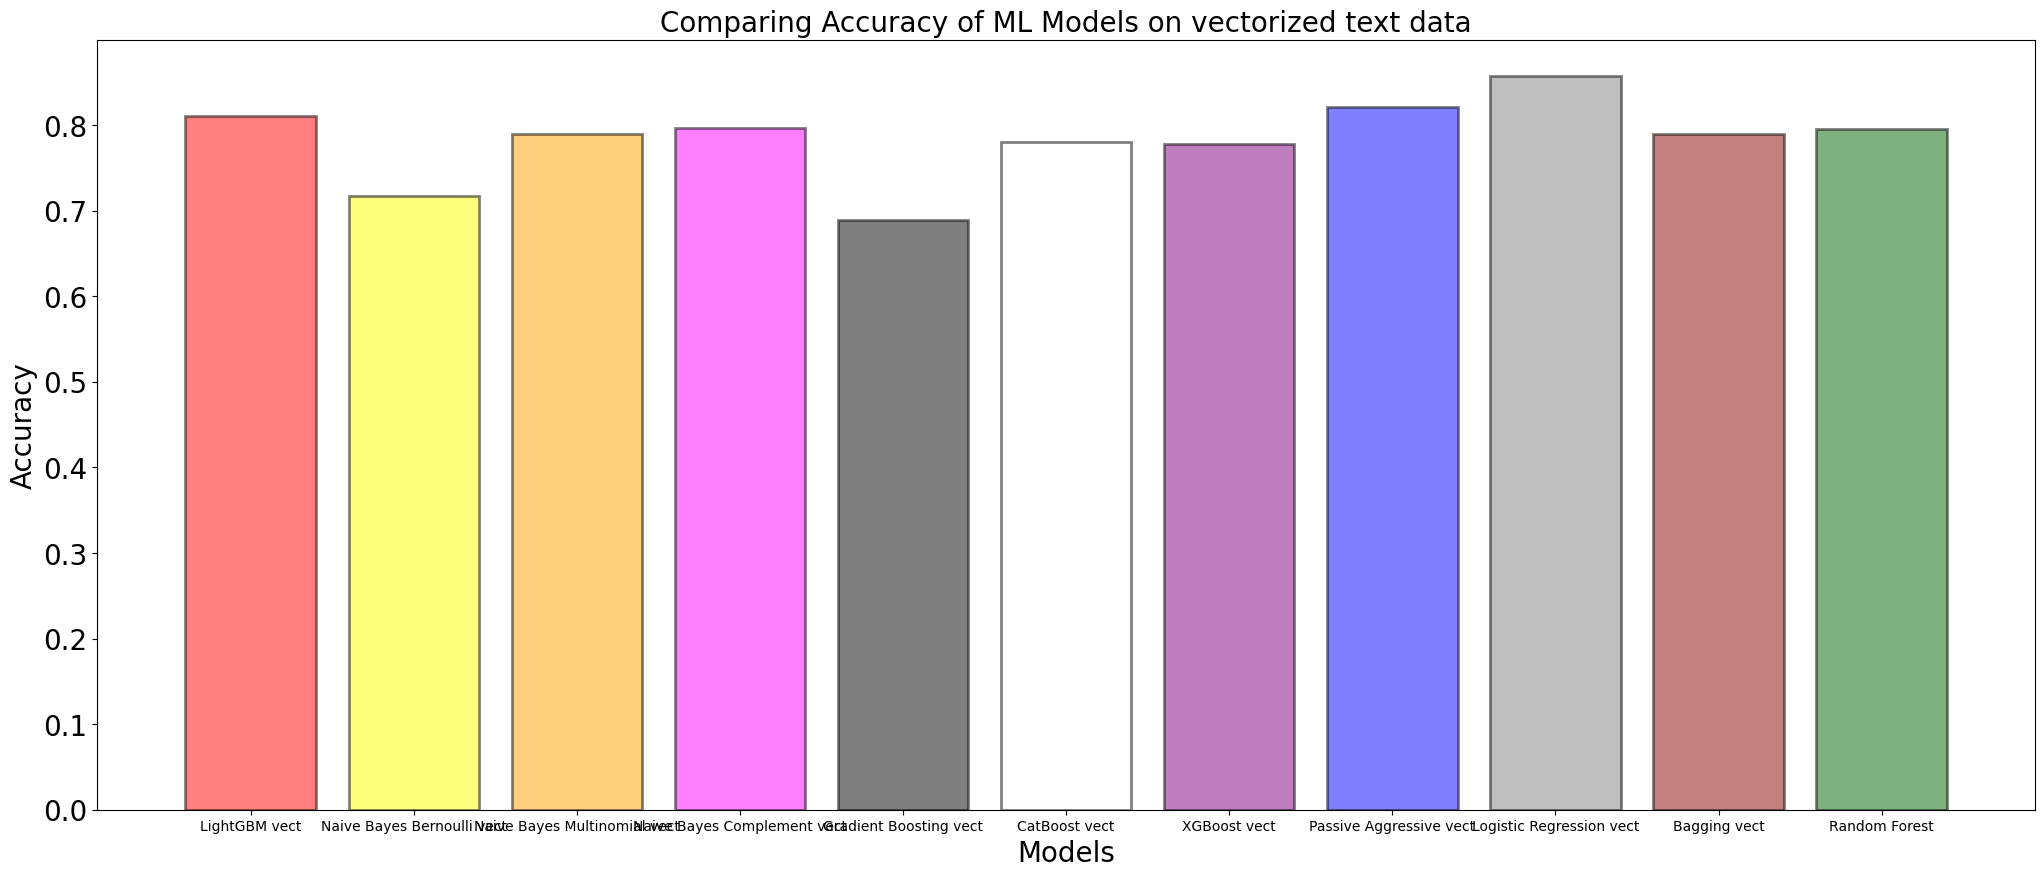

In [214]:
#Plotting accuracy of all the models with Bar-Graphs
plt.figure(figsize=(25,10))
plt.title('Comparing Accuracy of ML Models on vectorized text data',fontsize=20)
colors=['red','yellow','orange','magenta', 
        'black',
        'white', 
        'purple', 
        'blue',
        'gray',
       'darkred',
       'darkgreen']
plt.xticks(fontsize=10,color='black')
plt.yticks(fontsize=20,color='black')
plt.ylabel('Accuracy',fontsize=20)
plt.xlabel('Models',fontsize=20)
plt.bar(labels_vect.keys(),labels_vect.values(),edgecolor='black',color=colors, linewidth=2,alpha=0.5);



# COMPARE f1 score OF MODELS ON TEXT DATA ONLY


In [215]:
print("LightGBM vect f1 score :", f1_LightGBM_vect)
print("Naive Bayes Bernoulli vect f1 score :", f1_NB_Bern_vect)
print("Naive Bayes Multinomial vect f1 score :", f1_NB_Mult_vect)
print("Naive Bayes Complement vect f1 score :", f1_NB_Compl_vect)
print("GradientBoosting vect f1 score :", f1_GradBoost_vect)
print("CatBoost vect f1 score :", f1_CatBoost_vect)
print("XGBoost vect f1 score :", f1_XGBoost_vect)
# print("KNN vect accuracy score :", f1_knn_vect)
# print("SVM vect accuracy score :", f1_SVM_vect)
print("Passive Aggressive vect f1 score :", f1_PassAgg_vect)
print("Logistic Regression vect f1 score :", f1_LogReg_vect)
print("Bagging vect f1 score :", f1_bag_vect)
print("Random Forest vect f1 score :", f1_rf_vect)


LightGBM vect f1 score : 0.7784959798202743
Naive Bayes Bernoulli vect f1 score : 0.7142986671502404
Naive Bayes Multinomial vect f1 score : 0.7241054613935969
Naive Bayes Complement vect f1 score : 0.7426458036984354
GradientBoosting vect f1 score : 0.6323451280416533
CatBoost vect f1 score : 0.7426771653543308
XGBoost vect f1 score : 0.7417114812300946
Passive Aggressive vect f1 score : 0.8027945694182935
Logistic Regression vect f1 score : 0.8369287393927001
Bagging vect f1 score : 0.7425373134328358
Random Forest vect f1 score : 0.7252707581227437


In [219]:
#Creating the Dictionary with model name as key adn accuracy as key-value
labels_vect_f1  = {'LightGBM vect':f1_LightGBM_vect,
                   'Naive Bayes Bernoulli vect':f1_NB_Bern_vect,
        'Naive Bayes Multinomial vect':f1_NB_Mult_vect,
        'Naive Bayes Complement vect':f1_NB_Compl_vect,
        'Gradient Boosting vect':f1_GradBoost_vect,
        'CatBoost vect':f1_CatBoost_vect,  
        'XGBoost vect':f1_XGBoost_vect, 
        'Passive Aggressive vect':f1_PassAgg_vect,
        'Logistic Regression vect':f1_LogReg_vect,
        'Bagging vect':f1_bag_vect,
        'Random Forest vect':f1_rf_vect}


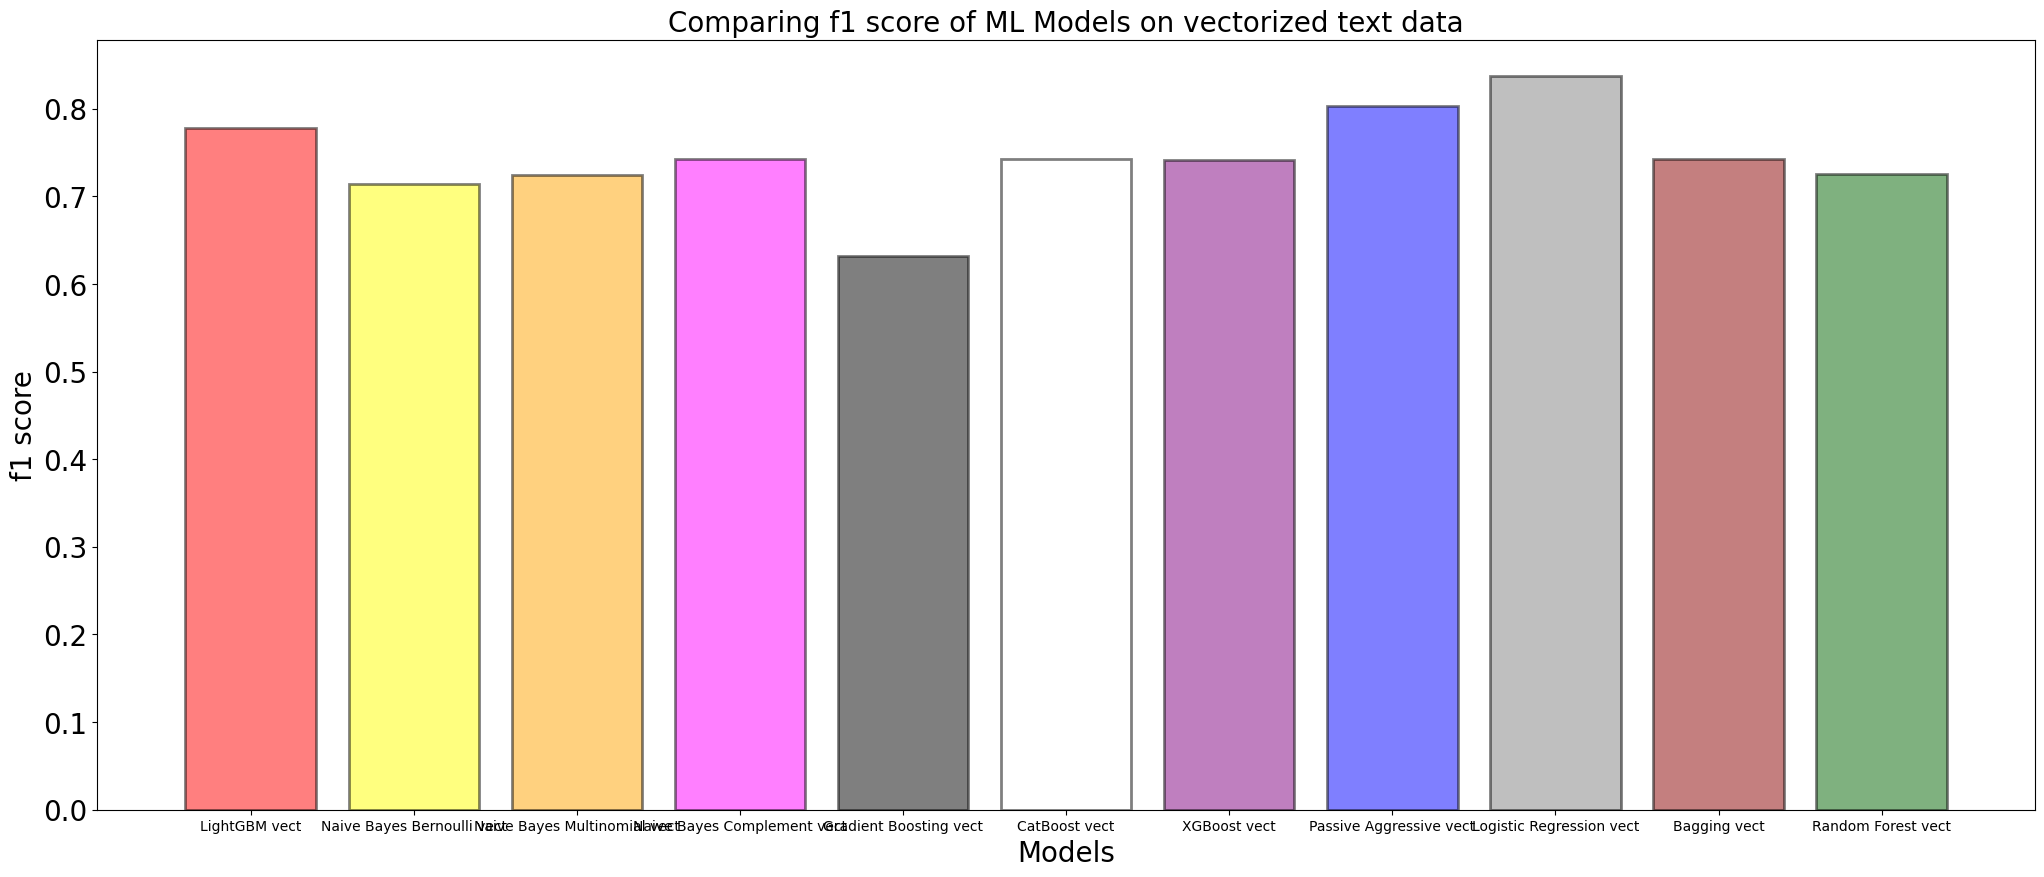

In [220]:
#Plotting accuracy of all the models with Bar-Graphs
plt.figure(figsize=(25,10))
plt.title('Comparing f1 score of ML Models on vectorized text data',fontsize=20)
colors=['red','yellow',
        'orange',
        'magenta', 
         'black',
        'white', 
        'purple', 
        'blue',
        'gray',
        'darkred',
       'darkgreen']
plt.xticks(fontsize=10,color='black')
plt.yticks(fontsize=20,color='black')
plt.ylabel('f1 score',fontsize=20)
plt.xlabel('Models',fontsize=20)
plt.bar(labels_vect_f1.keys(),labels_vect_f1.values(),edgecolor='black',color=colors, linewidth=2,alpha=0.5);



# COMPARE CONFUSION MATRICES


In [ ]:
#cf_matrix_PassAgg_vect = confusion_matrix(Y_test, y_pred_PassAgg_vect)
#print(cf_matrix_PassAgg_vect)

#cf_matrix_LogReg_vect = confusion_matrix(Y_test, y_pred_LogReg_vect)
#print(cf_matrix_LogReg_vect)

#cf_matrix_GradBoost_vect = confusion_matrix(Y_test, y_pred_GradBoost_vect)
#print(cf_matrix_GradBoost_vect)

#cf_matrix_Complement_vect = confusion_matrix(Y_test, y_pred_NB_Complement_vect)
#print(cf_matrix_Complement_vect)

#cf_matrix_Multinomial_vect = confusion_matrix(Y_test, y_pred_NB_Multinomial_vect)
#print(cf_matrix_Multinomial_vect)

#conf_matrix_Bern_vect = confusion_matrix(Y_test, y_pred_Bern_vect)
#print("Confusion Matrix:\n",  conf_matrix_Bern_vect)

#conf_matrix_LightGBM_vect = confusion_matrix(Y_test, y_pred_LightGBM_vect)
#print("Confusion Matrix:\n",  conf_matrix_LightGBM_vect)

In [ ]:
#### LIGHTGBM

In [129]:
pd.crosstab(Y_test, y_pred_LightGBM_vect, rownames=["true"], colnames=["predict"])


predict,0,1
true,,
0.0,10634,1607
1.0,2608,7407


Confusion Matrix for LightGBM


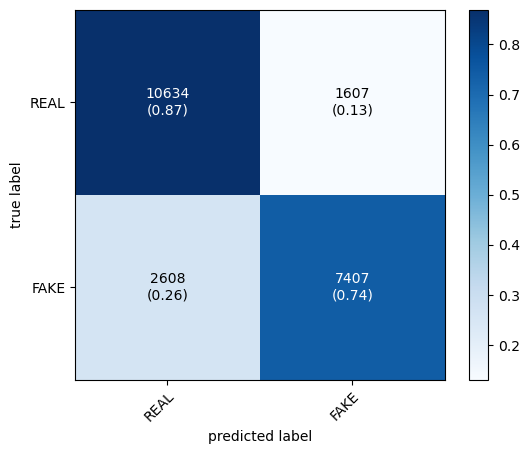

In [131]:
from mlxtend.plotting import plot_confusion_matrix

print("Confusion Matrix for LightGBM")
plot_confusion_matrix(conf_mat = cf_matrix_LightGBM_vect,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True,
                      class_names=['REAL','FAKE'])

plt.show();


In [132]:
#### NAIVE BAYES BERNOULLI

In [133]:
pd.crosstab(Y_test, y_pred_NB_Bern_vect, rownames=["true"], colnames=["predict"])


predict,0.0,1.0
true,,
0.0,8076,4165
1.0,2137,7878


Confusion Matrix for Naive Bayes Bernoulli


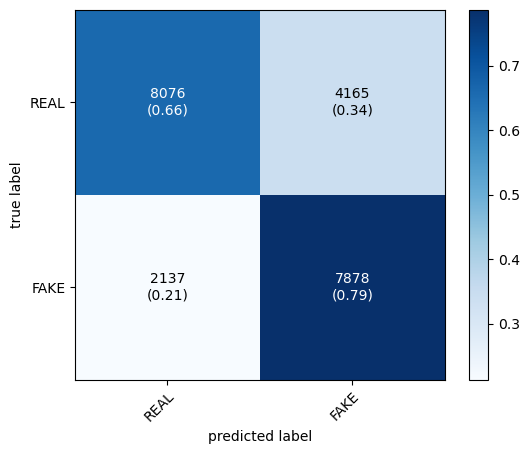

In [135]:
from mlxtend.plotting import plot_confusion_matrix

print("Confusion Matrix for Naive Bayes Bernoulli")
# plt.figure(figsize=(5,5))
plot_confusion_matrix(conf_mat = cf_matrix_NB_Bern_vect,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True,
                      class_names=['REAL','FAKE'])
plt.show();


In [ ]:
#### NAIVE BAYES MULTINOMIAL

In [136]:
pd.crosstab(Y_test, y_pred_NB_Mult_vect, rownames=["true"], colnames=["predict"])


predict,0.0,1.0
true,,
0.0,11416,825
1.0,3863,6152


Confusion Matrix for Naive Bayes Multinomial


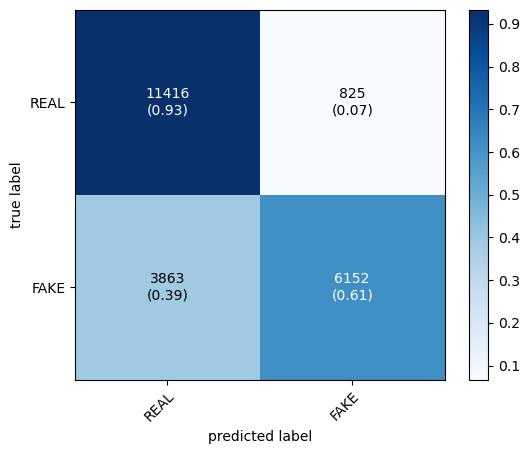

In [139]:
from mlxtend.plotting import plot_confusion_matrix

print("Confusion Matrix for Naive Bayes Multinomial")
plot_confusion_matrix(conf_mat = cf_matrix_NB_Mult_vect,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True,
                      class_names=['REAL','FAKE'])
plt.show();


In [ ]:
#### NAIVE BAYES COMPLEMENT

In [140]:
pd.crosstab(Y_test, y_pred_NB_Compl_vect, rownames=["true"], colnames=["predict"])


predict,0.0,1.0
true,,
0.0,11207,1034
1.0,3489,6526


Confusion Matrix for Naive Bayes Complement


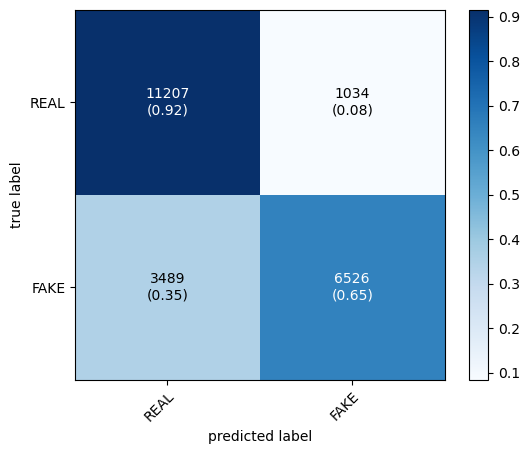

In [141]:
from mlxtend.plotting import plot_confusion_matrix

print("Confusion Matrix for Naive Bayes Complement")
plot_confusion_matrix(conf_mat = cf_matrix_Compl_vect,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True,
                      class_names=['REAL','FAKE'])
plt.show();


In [ ]:
#### GRADIENT BOOSTING

In [142]:
pd.crosstab(Y_test, y_pred_GradBoost_vect, rownames=["true"], colnames=["predict"])


predict,0.0,1.0
true,,
0.0,9385,2856
1.0,4064,5951


Confusion Matrix for Gradient Boosting


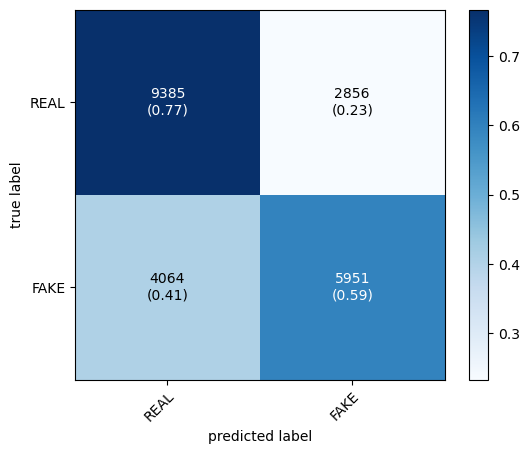

In [143]:
from mlxtend.plotting import plot_confusion_matrix

print("Confusion Matrix for Gradient Boosting")
plot_confusion_matrix(conf_mat = cf_matrix_GradBoost_vect,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True,
                      class_names=['REAL','FAKE'])
plt.show();


In [ ]:
#### CATBOOST

In [178]:
pd.crosstab(Y_test, y_pred_CatBoost_vect, rownames=["true"], colnames=["predict"])


predict,0.0,1.0
true,,
0.0,10280,1961
1.0,2941,7074


Confusion Matrix for CatBoost


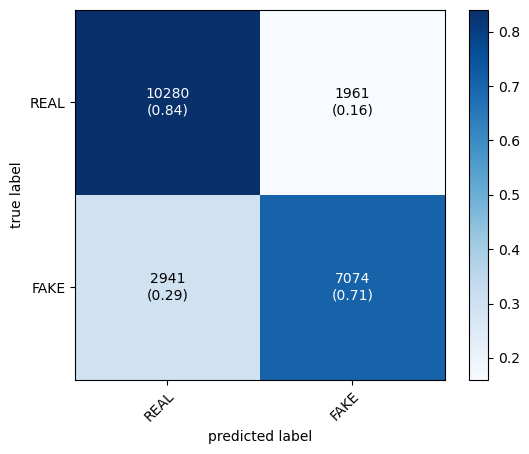

In [179]:
from mlxtend.plotting import plot_confusion_matrix

print("Confusion Matrix for CatBoost")
plot_confusion_matrix(conf_mat = cf_matrix_CatBoost_vect,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True,
                      class_names=['REAL','FAKE'])
plt.show();


In [ ]:
#### XGBOOST

In [148]:
pd.crosstab(Y_test, y_pred_binary_vect, rownames=["true"], colnames=["predict"])


predict,0,1
true,,
0.0,10206,2035
1.0,2912,7103


Confusion Matrix for XGBoost


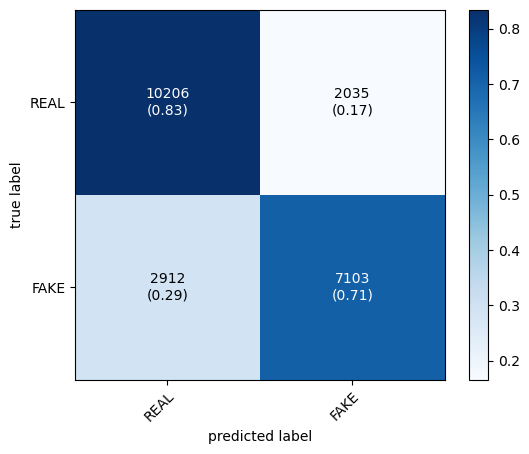

In [151]:
from mlxtend.plotting import plot_confusion_matrix

print("Confusion Matrix for XGBoost")
plot_confusion_matrix(conf_mat = cf_matrix_XGBoost_vect,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True,
                      class_names=['REAL','FAKE'])
plt.show();


In [ ]:
#### LOGISTIC REGRESSION

In [152]:
pd.crosstab(Y_test, y_pred_LogReg_vect, rownames=["true"], colnames=["predict"])


predict,0.0,1.0
true,,
0.0,10880,1361
1.0,1829,8186


Confusion Matrix for Logistic Regression


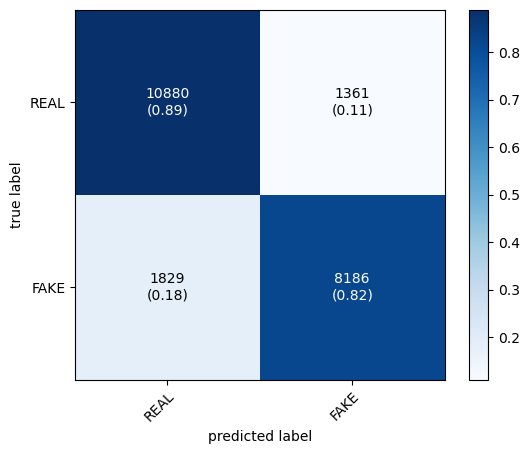

In [153]:
from mlxtend.plotting import plot_confusion_matrix

print("Confusion Matrix for Logistic Regression")
plot_confusion_matrix(conf_mat = cf_matrix_LogReg_vect,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True,
                      class_names=['REAL','FAKE'])
plt.show();


In [ ]:
#### PASSIVE AGGRESSIVE 

In [154]:
pd.crosstab(Y_test, y_pred_PassAgg_vect, rownames=["true"], colnames=["predict"])


predict,0.0,1.0
true,,
0.0,10175,2066
1.0,1914,8101


Confusion Matrix for Passive Aggressive


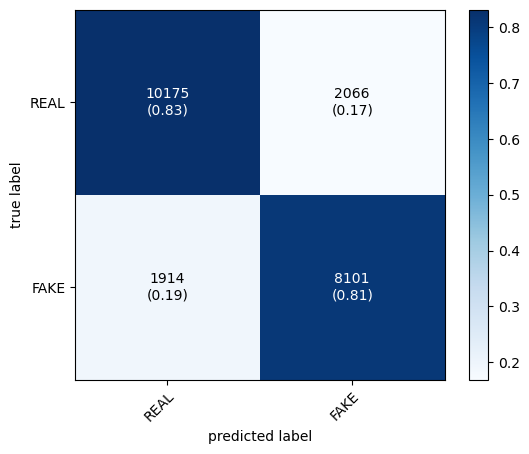

In [155]:
from mlxtend.plotting import plot_confusion_matrix

print("Confusion Matrix for Passive Aggressive")
plot_confusion_matrix(conf_mat = cf_matrix_PassAgg_vect,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True,
                      class_names=['REAL','FAKE'])
plt.show();


In [ ]:
#### BAGGING

In [197]:
pd.crosstab(Y_test, y_pred_bag_vect, rownames=["true"], colnames=["predict"])


predict,0.0,1.0
true,,
0.0,10798,1443
1.0,3249,6766


Confusion Matrix for Bagging


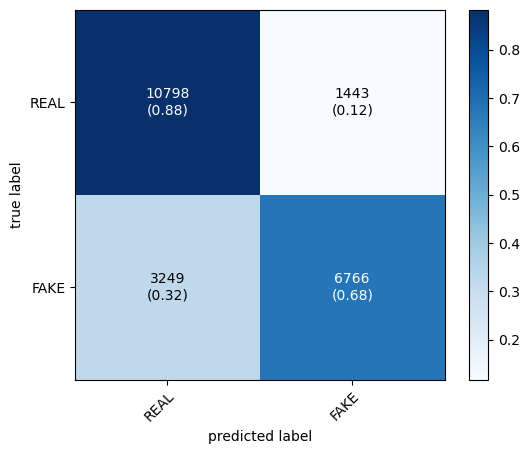

In [198]:
from mlxtend.plotting import plot_confusion_matrix

print("Confusion Matrix for Bagging")
plot_confusion_matrix(conf_mat = cf_matrix_bag_vect,
                      show_absolute=True,
                      show_normed=True,
                      colorbar=True,
                      class_names=['REAL','FAKE'])
plt.show();


In [ ]:
##### RANDOM FOREST

# Building a system


In [156]:
# Finally to make this model useful we need to make a system. 
# Taking a sample out of the test-set (I took the first sample):
X_sample = X_test_text[1]

In [157]:
# Checking our prediction for this sample:

# LightGBM
prediction = clf_LightGBM_vect.predict(X_sample)
if prediction == 0:
    print('The NEWS is Real!')
else:
    print('The NEWS is Fake!')

The NEWS is Fake!


In [158]:
# Checking our prediction for this sample:

# NB Bernoulli
prediction = clf_Bern_vect.predict(X_sample)
if prediction == 0:
    print('The NEWS is Real!')
else:
    print('The NEWS is Fake!')

The NEWS is Real!


In [159]:
# Checking our prediction for this sample:

# NB Multinomial
prediction = clf_mult_vect.predict(X_sample)
if prediction == 0:
    print('The NEWS is Real!')
else:
    print('The NEWS is Fake!')

The NEWS is Real!


In [160]:
# Checking our prediction for this sample:

# PAC
prediction = pac.predict(X_sample)
if prediction == 0:
    print('The NEWS is Real!')
else:
    print('The NEWS is Fake!')

The NEWS is Real!


In [161]:
# LOG REG
prediction = clf_LogReg_vect.predict(X_sample)
if prediction == 0:
    print('The NEWS is Real!')
else:
    print('The NEWS is Fake!')

The NEWS is Real!


# VOTING


#### LightGBM vect f1 score : 0.7784959798202743
Naive Bayes Bernoulli vect f1 score : 0.7142986671502404
Naive Bayes Multinomial vect f1 score : 0.7241054613935969
Naive Bayes Complement vect f1 score : 0.7426458036984354
GradientBoosting vect f1 score : 0.6323451280416533
CatBoost vect f1 score : 0.7426771653543308
XGBoost vect f1 score : 0.7417114812300946
#### Passive Aggressive vect f1 score : 0.8027945694182935
#### Logistic Regression vect f1 score : 0.8369287393927001
Bagging vect f1 score : 0.7425373134328358
Random Forest vect f1 score : 0.7252707581227437


## We try voting with 3 best models

LightGBM
Logistic Regression
Passive Aggressive Classifier

In [ ]:
### MODELS
# LightGBM: clf_LightGBM_vect
# Gradient Boosting: GradBoost_vect
# CatBoost: catboost_vect
# LogReg: clf_LogReg_vect
# Passive Aggressive: pac
# Bagging: bag
# Random Forest: clf_rf


In [ ]:
### Predictions
# LightGBM: y_pred_LightGBM_vect
# Gradient Boosting: y_pred_GradBoost_vect
# CatBoost: y_pred_CatBoost_vect
# LogReg: y_pred_LogReg_vect
# Passive Aggressive: y_pred_PassAgg_vect
# Bagging: y_pred_bag_vect
# Random Forest: y_pred_rf_vect


In [221]:
from sklearn.ensemble import VotingClassifier

In [222]:
#### ERROR

# Create the voting classifier
#voting_model = VotingClassifier(
#    estimators=[('logistic', clf_LogReg_vect), ('lgbm', clf_LightGBM_vect), ('pa', pac)],
#    voting='hard'  # Use 'hard' voting to let each model's predicted class vote
#)


In [224]:
# Create the voting classifier
voting_model = VotingClassifier(
    estimators=[('logistic', clf_LogReg_vect), ('pa', pac)],
    voting='hard'  # Use 'hard' voting to let each model's predicted class vote
)


In [225]:
# Train the voting classifier
voting_model.fit(X_train_text, Y_train)


VotingClassifier(estimators=[('logistic', LogisticRegression()),
                             ('pa',
                              PassiveAggressiveClassifier(class_weight='balanced',
                                                          max_iter=50))])

In [226]:
# Make predictions using the voting classifier
voting_preds = voting_model.predict(X_test_text)


In [227]:
# Evaluate the accuracy of the voting classifier
accuracy_voring = accuracy_score(Y_test, voting_preds)
print("Voting model accuracy:", accuracy_voring)

# 0.844

Voting model accuracy: 0.8441319194823867


In [228]:
# Evaluate the f1 score of the voting model
f1_voting_vect = f1_score(Y_test, voting_preds)
print("Voting model f1 score:", f1_voting_vect)

# 0.81

Voting model f1 score: 0.8124763500729769


In [229]:
# get confusion matrix
pd.crosstab(Y_test, voting_preds, rownames=["true"], colnames=["predict"])


predict,0.0,1.0
true,,
0.0,11272,969
1.0,2500,7515


In [230]:
from sklearn.metrics import classification_report 

# get classification report
print("Voting vect classification report:\n ", classification_report (Y_test, voting_preds))


Voting vect classification report:
                precision    recall  f1-score   support

         0.0       0.82      0.92      0.87     12241
         1.0       0.89      0.75      0.81     10015

    accuracy                           0.84     22256
   macro avg       0.85      0.84      0.84     22256
weighted avg       0.85      0.84      0.84     22256



In [231]:
# create confusion matrix
cf_matrix_voting_vect = confusion_matrix(Y_test, voting_preds)
print(cf_matrix_voting_vect)


[[11272   969]
 [ 2500  7515]]


# STACKING

## We try stacking with 3 best models

LightGBM
Logistic Regression
Passive Aggressive Classifier

In [ ]:
### MODELS
# LightGBM: clf_LightGBM_vect
# Gradient Boosting: GradBoost_vect
# CatBoost: catboost_vect
# LogReg: clf_LogReg_vect
# Passive Aggressive: pac
# Bagging: bag
# Random Forest: clf_rf


In [ ]:
### Predictions
# LightGBM: y_pred_LightGBM_vect
# Gradient Boosting: y_pred_GradBoost_vect
# CatBoost: y_pred_CatBoost_vect
# LogReg: y_pred_LogReg_vect
# Passive Aggressive: y_pred_PassAgg_vect
# Bagging: y_pred_bag_vect
# Random Forest: y_pred_rf_vect


In [232]:
# Create a new feature matrix with the predictions
# stacked_features = np.column_stack((y_pred_LogReg_vect, y_pred_LightGBM_vect, y_pred_PassAgg_vect))


In [240]:
# Create a new feature matrix with the predictions
stacked_features = np.column_stack((y_pred_LogReg_vect, y_pred_PassAgg_vect))


In [241]:
# Train the meta model (Logistic Regression in this case) on the new feature matrix
meta_model = clf_LogReg_vect
meta_model.fit(stacked_features, Y_test)


LogisticRegression()

In [242]:
# Make final predictions using the meta model
meta_preds = meta_model.predict(stacked_features)


In [243]:
# Evaluate the accuracy of the stacked model
accuracy_meta = accuracy_score(Y_test, meta_preds)
print("Stacked model accuracy:", accuracy_meta)

# 0.856

Stacked model accuracy: 0.8566678648454349


In [244]:
# Evaluate the f1 score of the stacked model
f1_meta_vect = f1_score(Y_test, meta_preds)
print("Stacked model f1 score:", f1_meta_vect)

# 0.836

Stacked model f1 score: 0.8369287393927001


In [246]:
# get confusion matrix
pd.crosstab(Y_test, meta_preds, rownames=["true"], colnames=["predict"])


predict,0.0,1.0
true,,
0.0,10880,1361
1.0,1829,8186


In [ ]:
from sklearn.metrics import classification_report 

# get classification report
print("Stacking vect classification report:\n ", classification_report (Y_test, meta_preds))


In [248]:
# create confusion matrix
cf_matrix_meta_vect = confusion_matrix(Y_test, meta_preds)
print(cf_matrix_meta_vect)


[[10880  1361]
 [ 1829  8186]]


# INTERPRETATION

In [ ]:
### for lightgbm, logreg, passive aggressive

In [ ]:
### MODELS
# LightGBM: clf_LightGBM_vect
# Gradient Boosting: GradBoost_vect
# CatBoost: catboost_vect
# LogReg: clf_LogReg_vect
# Passive Aggressive: pac
# Bagging: bag
# Random Forest: clf_rf


In [251]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from lightgbm import LGBMClassifier
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest, f_classif
import shap

In [252]:
# Generate some sample data for demonstration
x, y = make_classification(n_samples=100, n_features=10, random_state=42)


In [255]:
# Get feature importances for Logistic Regression
logistic_importances = np.abs(clf_LogReg_vect.coef_)

[[2.63981729 1.45586272]]


In [ ]:
# Feature Importances
print("Logistic Regression Feature Importances:")
print(logistic_importances)

In [256]:
# Get feature importances for Passive Aggressive Classifier
pa_importances = np.abs(pac.coef_)

[[2.18395829 0.57932084 0.18546505 ... 0.         0.50123613 0.50123613]]


In [ ]:
print("\nPassive Aggressive Classifier Feature Importances:")
print(pa_importances)

In [259]:
# SelectKBest - Feature Scores
selector = SelectKBest(score_func=f_classif, k=5)  # Select top 5 features
X_selected = selector.fit_transform(x, y)
feature_scores = selector.scores_


In [260]:
# Feature Scores
print("\nFeature Scores:")
for i, score in enumerate(feature_scores):
    print(f"Feature {i+1}: {score}")
    


Feature Scores:
Feature 1: 136.92548062124703
Feature 2: 1.1637108731123826
Feature 3: 290.6773107540884
Feature 4: 4.177104058867085
Feature 5: 0.13735472111189667
Feature 6: 0.14914692797581217
Feature 7: 0.7093951804713496
Feature 8: 0.29032235579308047
Feature 9: 0.35762019759857605
Feature 10: 2.8458136517572354


In [ ]:
### for random forest

In [262]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest, f_classif
import shap

In [263]:
# Get feature importances for Random Forest
rf_importances = clf_rf.feature_importances_

In [264]:
# Feature Importances
print("Random Forest Feature Importances:")
print(rf_importances)

Random Forest Feature Importances:
[8.59351422e-05 6.80882376e-04 1.65076452e-06 ... 0.00000000e+00
 5.90309144e-06 5.81740639e-06]


In [265]:
# SelectKBest - Feature Scores
selector_rf = SelectKBest(score_func=f_classif, k=5)  # Select top 5 features
X_selected_rf = selector_rf.fit_transform(x, y)
feature_scores_rf = selector_rf.scores_

In [266]:
# Feature Scores
print("\nFeature Scores rf:")
for i, score in enumerate(feature_scores_rf):
    print(f"Feature {i+1}: {score}")
    


Feature Scores rf:
Feature 1: 136.92548062124703
Feature 2: 1.1637108731123826
Feature 3: 290.6773107540884
Feature 4: 4.177104058867085
Feature 5: 0.13735472111189667
Feature 6: 0.14914692797581217
Feature 7: 0.7093951804713496
Feature 8: 0.29032235579308047
Feature 9: 0.35762019759857605
Feature 10: 2.8458136517572354


In [ ]:
# SHAP
explainer = shap.Explainer(clf_rf)
shap_values = explainer.shap_values(x)

In [ ]:
# SHAP values
print("\nSHAP Values:")
print(shap_values)

In [ ]:
##### plot

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have feature importances stored in 'importances' variable

# Sort feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_features = features[sorted_indices]

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances, y=sorted_features, palette="viridis")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances")
plt.show()